In [1]:
import numpy as np
import pandas as pd
import pyomo.environ as pyEnv
import matplotlib.pyplot as plt
import os
import sys

sys.path.append('..')
from src.solver import relocate_bicycles
path = '../data/processed/'

In [2]:
categories = pd.read_csv(f'{path}categories.csv')
a = categories.iloc[0].values
print('Disponibilidade: ', a)
s = categories.iloc[1].values
print('Capacidade: ', s)

areas = [pd.read_csv(f'{path}area{i+1}.csv') for i in range(7)]
matrix = np.stack([area.T.values for area in areas], axis=0)
print('Shape Áreas: ', matrix.shape)

Disponibilidade:  [272. 270. 279. 267. 282. 279.]
Capacidade:  [1.  1.5 1.5 1.7 1.7 4. ]
Shape Áreas:  (7, 6, 115)


In [3]:
T = np.arange(100, 4100, 100)
profits = [relocate_bicycles(matrix, a, s, t, show_results=False)[0] for t in T]

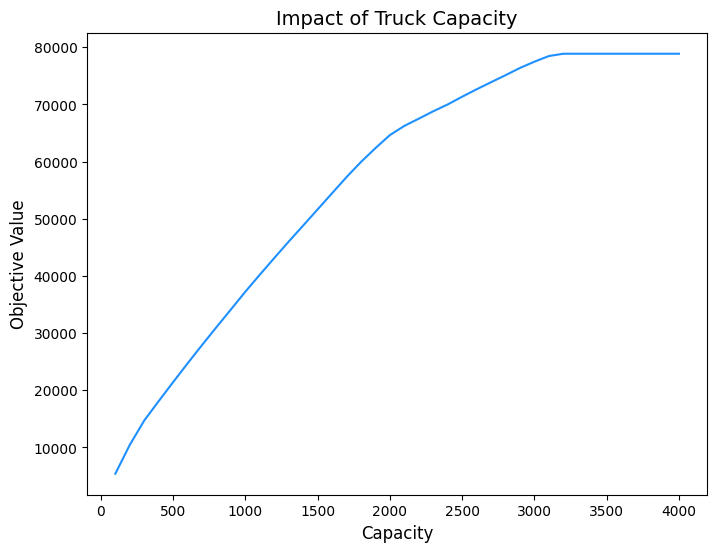

In [34]:
plt.figure(figsize=(8,6))
plt.plot(T, profits, label='Profit', color='dodgerblue', linewidth=1.5)
plt.title('Impact of Truck Capacity', fontsize=14)
plt.xlabel('Capacity', fontsize=12) 
plt.ylabel('Objective Value', fontsize=12) 
plt.savefig('../data/results/truck_capacity.png')
plt.show()